# Notebook to test data 
### Vera Jackson 

## Packages


In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Load data

In [7]:
nutrition = pd.read_csv("../data/Nutrition.csv")

print(nutrition.columns)

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')


There are 33 columns, and **104,272** rows or observations

In [8]:
nutrition.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH


In [9]:
# Obtaining unique values of all field of interest
# column "data_value" gives us percent
print(nutrition['YearStart'].unique())
print(nutrition['Age(years)'].unique())
print(nutrition['Education'].unique())
print(nutrition['Gender'].unique())
print(nutrition['Income'].unique())
print(nutrition['Race/Ethnicity'].unique())
print(nutrition['Class'].unique())
print(nutrition['Topic'].unique())
print(nutrition['StratificationCategory1'].unique())

nutrition['Question'].unique()

[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
[nan '35 - 44' '25 - 34' '18 - 24' '55 - 64' '65 or older' '45 - 54']
[nan 'Less than high school' 'Some college or technical school'
 'High school graduate' 'College graduate']
[nan 'Female' 'Male']
[nan '$15,000 - $24,999' '$50,000 - $74,999' '$75,000 or greater'
 'Less than $15,000' '$25,000 - $34,999' 'Data not reported'
 '$35,000 - $49,999']
['2 or more races' 'Other' nan 'Non-Hispanic White' 'Asian'
 'Hawaiian/Pacific Islander' 'American Indian/Alaska Native' 'Hispanic'
 'Non-Hispanic Black']
['Obesity / Weight Status' 'Physical Activity' 'Fruits and Vegetables']
['Obesity / Weight Status' 'Physical Activity - Behavior'
 'Fruits and Vegetables - Behavior']
['Race/Ethnicity' 'Gender' 'Age (years)' 'Income' 'Education' 'Total']


array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who engage in no leisure-time physical activity',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combinatio

## Data Cleanup

In [107]:
data = nutrition

# remove YearEnd column
data.loc[data['YearStart'] != data['YearEnd']]
activity = data.drop(columns='YearEnd')

# only keep columns for physical activity
activity = activity.loc[activity['Topic'] == 'Physical Activity - Behavior']
#activity.drop(columns=["Total", "Education", "Age(years)", "Gender", "Race/Ethnicity", "GeoLocation"], inplace=True)
#activity = activity[activity['StratificationCategory1'] == "Income"]
activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55720 entries, 2 to 104271
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   55720 non-null  int64  
 1   LocationAbbr                55720 non-null  object 
 2   LocationDesc                55720 non-null  object 
 3   Datasource                  55720 non-null  object 
 4   Class                       55720 non-null  object 
 5   Topic                       55720 non-null  object 
 6   Question                    55720 non-null  object 
 7   Data_Value_Unit             46480 non-null  float64
 8   Data_Value_Type             55720 non-null  object 
 9   Data_Value                  49962 non-null  float64
 10  Data_Value_Alt              49962 non-null  float64
 11  Data_Value_Footnote_Symbol  5758 non-null   object 
 12  Data_Value_Footnote         5758 non-null   object 
 13  Low_Confidence_Limit        49962 n

In [108]:
# look for missing values
cols_with_nulls = []
for col in activity.columns:
    if activity[col].isna().sum() > 0:
        cols_with_nulls.append(col)

print(f"Columns with 1 or more missing values:")
for i in cols_with_nulls:
    print(i)

Columns with 1 or more missing values:
Data_Value_Unit
Data_Value
Data_Value_Alt
Data_Value_Footnote_Symbol
Data_Value_Footnote
Low_Confidence_Limit
High_Confidence_Limit 
Sample_Size
Total
Age(years)
Education
Gender
Income
Race/Ethnicity
GeoLocation


In [109]:
# remove null values
#activity = activity.dropna(subset=['Data_Value'])

# print question
print('questions = ' +activity['Question'].unique())

['questions = Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week'
 'questions = Percent of adults who engage in muscle-strengthening activities on 2 or more days a week'
 'questions = Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'questions = Percent of adults who engage in no leisure-time physical activity'
 'questions = Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)']


In [110]:
# maps income ranges to numeric values
income_dict = {'Less than $15,000':0,
  '$15,000 - $24,999':15,
  '$25,000 - $34,999':25, 
  "$35,000 - $49,999":35, 
  '$50,000 - $74,999':50, 
  '$75,000 or greater':75,
        }

# removes data not reported
activity_clean = activity.loc[activity['Income'] != 'Data not reported']

# creates numeric column of income based on mappings
activity_clean['numeric_income'] = activity_clean['Income'].replace(income_dict)

/var/folders/37/h4qvqqks7tx9rp77777_dk2c0000gn/T/ipykernel_13845/4033378066.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  activity_clean['numeric_income'] = activity_clean['Income'].replace(income_dict)
/var/folders/37/h4qvqqks7tx9rp77777_dk2c0000gn/T/ipykernel_13845/4033378066.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_clean['numeric_income'] = activity_clean['Income'].replace(income_dict)



 View: Average No Leisure by Year and Income Group: 
     YearStart  numeric_income  Data_Value
0        2011             0.0   34.494231
1        2011            15.0   33.398077
2        2011            25.0   29.407692
3        2011            35.0   25.611538
4        2011            50.0   21.878846
..        ...             ...         ...
73       2023            15.0   40.047170
74       2023            25.0   33.681132
75       2023            35.0   28.626415
76       2023            50.0   23.226415
77       2023            75.0   18.550943

[78 rows x 3 columns]


<Figure size 800x600 with 0 Axes>

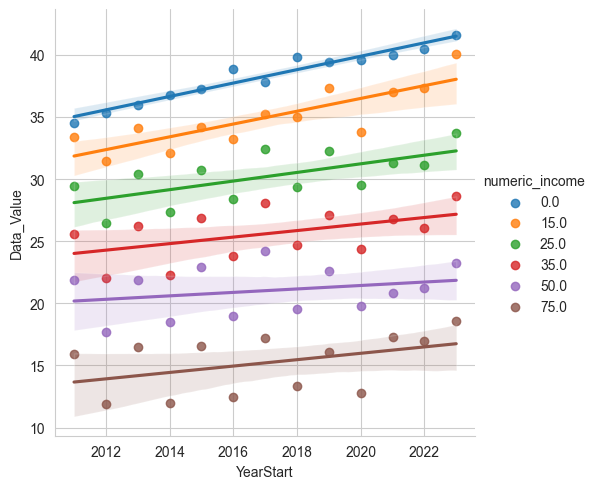

In [111]:
# setting up for plot
# Question: Percent of adults who engage in no leisure-time physical activity
nutrition_noleisuretime = activity_clean[activity_clean['Question']=='Percent of adults who engage in no leisure-time physical activity']
# Stratified by income
nutrition_noleisuretime_income = nutrition_noleisuretime[nutrition_noleisuretime['StratificationCategory1']=='Income']

# Average the Percent of No Lesiure individuals by Year and Income Group:
grouped2 = nutrition_noleisuretime.groupby(['YearStart','numeric_income'])['Data_Value'].mean().reset_index()# No Lesiure by Income Group Print:

print("\n","View: Average No Leisure by Year and Income Group:","\n",grouped2)

sns.set_style('whitegrid')
plt.figure(figsize=(8,6))

sns.lmplot(data=grouped2, x="YearStart", y="Data_Value", hue="numeric_income")
plt.show()

/var/folders/37/h4qvqqks7tx9rp77777_dk2c0000gn/T/ipykernel_13845/1466188635.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutrition_noleisuretime_income['Income'] = pd.Categorical(nutrition_noleisuretime_income['Income'],


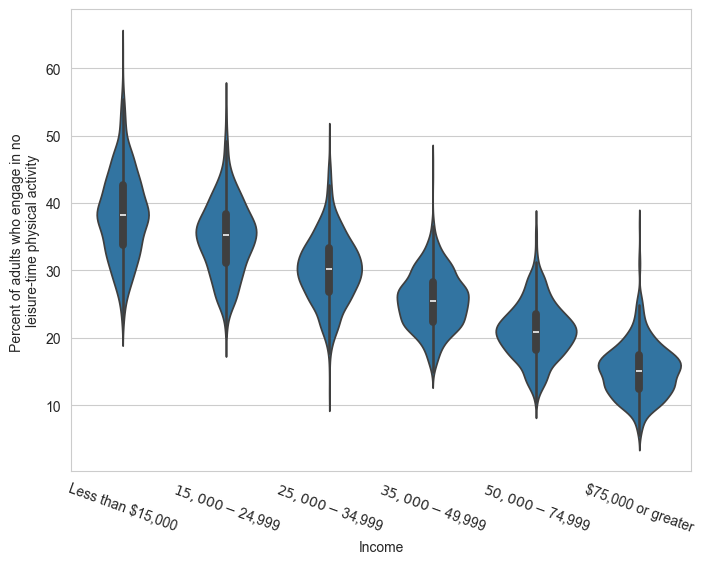

In [140]:
#graph of just income lvel by response
order = ['Less than $15,000',
  '$15,000 - $24,999',
  '$25,000 - $34,999', 
  "$35,000 - $49,999", 
  '$50,000 - $74,999', 
  '$75,000 or greater']
# order data 
nutrition_noleisuretime_income['Income'] = pd.Categorical(nutrition_noleisuretime_income['Income'], 
                                                          categories=order, ordered=True)


sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.violinplot(data=nutrition_noleisuretime_income, x="Income", y="Data_Value")
plt.xticks(rotation=-20)
plt.ylabel("Percent of adults who engage in no \nleisure-time physical activity")
plt.show()

<Figure size 800x600 with 0 Axes>

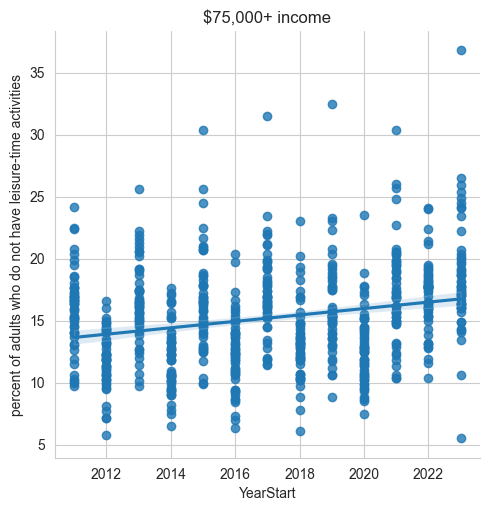

<Figure size 800x600 with 0 Axes>

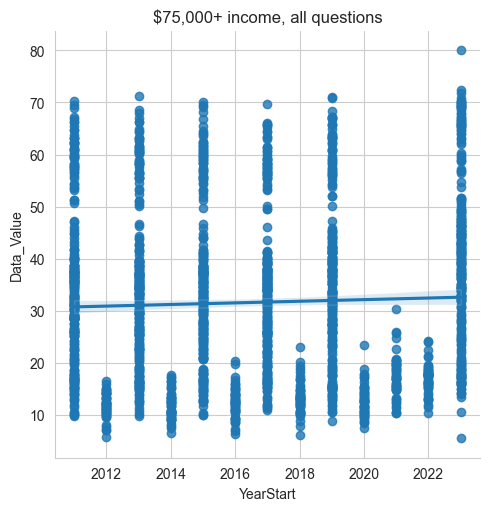

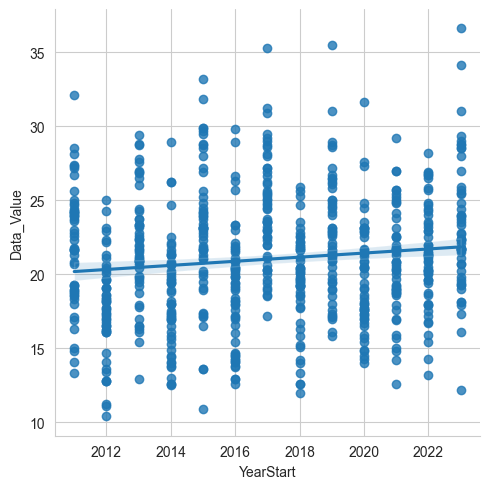

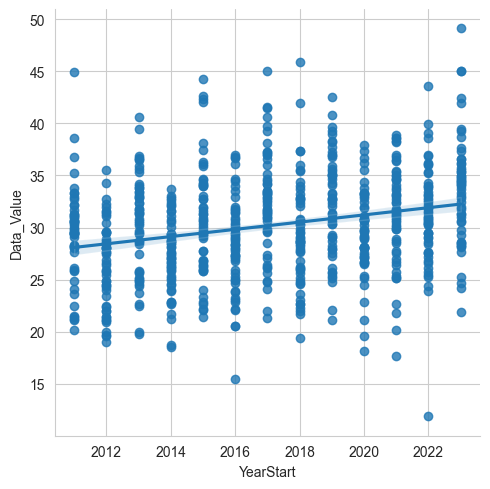

In [143]:
#only look at $75000 range to decipher width...

nutrition_75k = nutrition_noleisuretime[nutrition_noleisuretime['numeric_income']==75]

inc75k = activity_clean[activity_clean['numeric_income']==75]

nutrition_50k = nutrition_noleisuretime[nutrition_noleisuretime['numeric_income']==50]

nutrition_25k = nutrition_noleisuretime[nutrition_noleisuretime['numeric_income']==25]


sns.set_style('whitegrid')
plt.figure(figsize=(8,6))


sns.lmplot(data=nutrition_75k , x="YearStart", y="Data_Value")
plt.title("$75,000+ income")
plt.ylabel("percent of adults who do not have leisure-time activities")
plt.show()


#
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))


sns.lmplot(data=inc75k , x="YearStart", y="Data_Value")
plt.title("$75,000+ income, all questions")
plt.show()
#

sns.lmplot(data=nutrition_50k , x="YearStart", y="Data_Value")
plt.show()

sns.lmplot(data=nutrition_25k , x="YearStart", y="Data_Value")
plt.show()

## Visualizing

In [10]:
# separating dataset by question

# Question: Percent of adults who engage in no leisure-time physical activity
nutrition_noleisuretime = nutrition[nutrition['Question']=='Percent of adults who engage in no leisure-time physical activity']
# Stratified by income
nutrition_noleisuretime_income = nutrition_noleisuretime[nutrition_noleisuretime['StratificationCategory1']=='Income']

# Question: Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
nutrition_300min = nutrition[nutrition['Question']=='Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)']
# Stratified by income
nutrition_300min_income = nutrition_300min[nutrition_300min['StratificationCategory1']=='Income']

# Question: Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week
nutrition_150min = nutrition[nutrition['Question']=='Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week']
# Stratified by income
nutrition_150min_income = nutrition_150min[nutrition_150min['StratificationCategory1']=='Income']

# Question: Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week
nutrition_150min = nutrition[nutrition['Question']=='Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week']
# Stratified by income
nutrition_150min_income = nutrition_150min[nutrition_150min['StratificationCategory1']=='Income']


<Figure size 800x600 with 0 Axes>

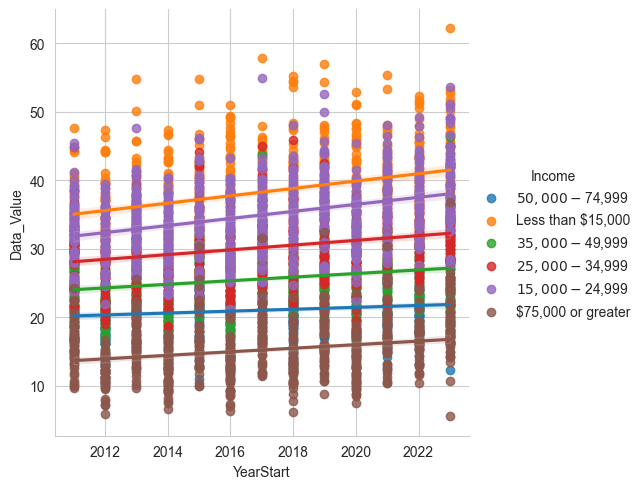

In [118]:
# setting up for plot
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))


sns.lmplot(data=nutrition_noleisuretime_income, x="YearStart", y="Data_Value", hue="Income")
plt.show()



In [17]:
# Make copy and remove 'Data Not Reported' data
grouped2 = nutrition_noleisuretime_income.copy()
grouped2 = (grouped2[grouped2['Income'] != 'Data not reported'])

# Group Income into Tiers
grouped2['Income_Group'] = np.where(grouped2['Income'] == 'Less than $15,000','Tier 1',np.where(
    grouped2['Income'] == '$15,000 - $24,999', 'Tier 1', np.where(
        grouped2['Income'] =='$25,000 - $34,999', 'Tier 2', np.where(
           grouped2['Income'] == '$35,000 - $49,999', 'Tier 2', 'Tier 3'
        )
    ) 
))

# View/Validate income groups:
unique_combo1 = grouped2[['Income', 'Income_Group']].drop_duplicates()
print(unique_combo1)

                 Income Income_Group
16    $50,000 - $74,999       Tier 3
59    Less than $15,000       Tier 1
102   $35,000 - $49,999       Tier 2
111   $25,000 - $34,999       Tier 2
156   $15,000 - $24,999       Tier 1
192  $75,000 or greater       Tier 3


We see that on average, those with a higher income are able to dedicate more time to working out.

Need to remove any "data not reported" data points.

Next, we will break down these statistics based on stratifications (age, gender, race/ethnicity, and education).

In [12]:
# looking at question "Percent of adults who engage in no leisure-time physical activity"

# Stratified by race
nutrition_noleisuretime_race = nutrition_noleisuretime[nutrition_noleisuretime['StratificationCategory1']=='Race/Ethnicity']

# Stratified by gender
nutrition_noleisuretime_gender = nutrition_noleisuretime[nutrition_noleisuretime['StratificationCategory1']=='Gender']

# Stratified by age
nutrition_noleisuretime_age = nutrition_noleisuretime[nutrition_noleisuretime['StratificationCategory1']=='Age (years)']

# Stratified by education
nutrition_noleisuretime_ed = nutrition_noleisuretime[nutrition_noleisuretime['StratificationCategory1']=='Education']



c:\Users\veraj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

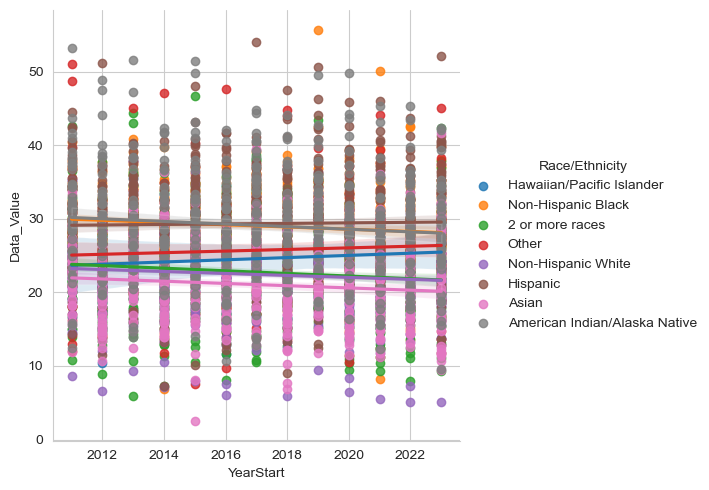

c:\Users\veraj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


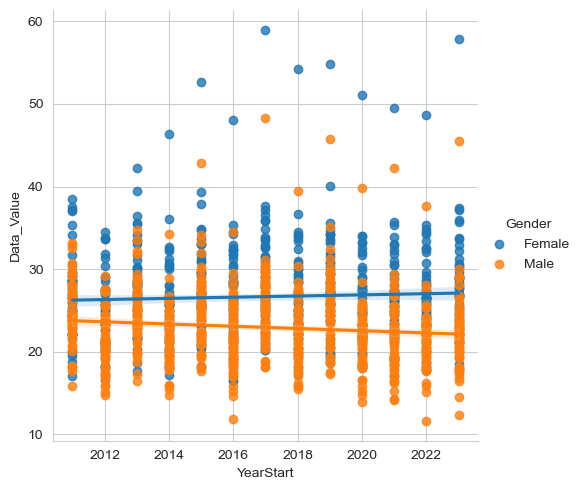

c:\Users\veraj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


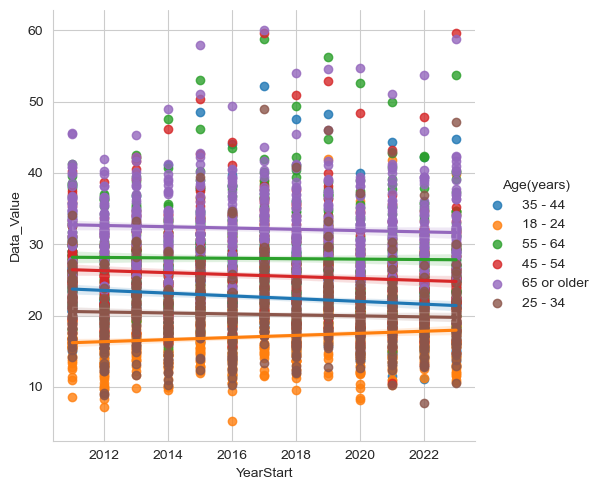

c:\Users\veraj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


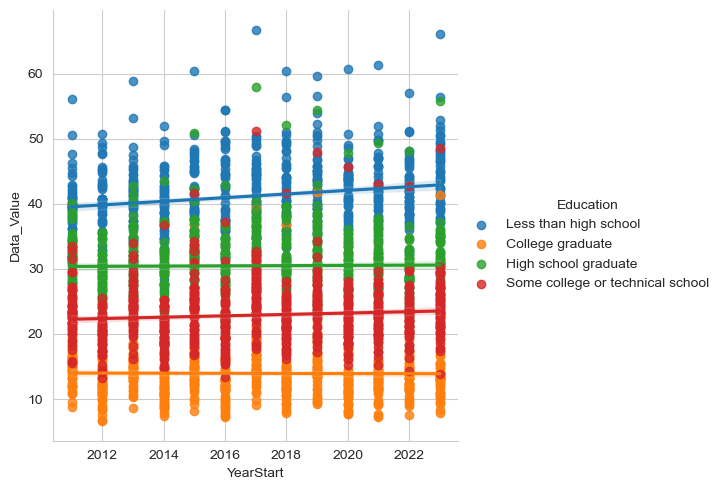

In [55]:
# setting up for plot
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))


sns.lmplot(data=nutrition_noleisuretime_race, x="YearStart", y="Data_Value", hue="Race/Ethnicity")
plt.show()


sns.lmplot(data=nutrition_noleisuretime_gender, x="YearStart", y="Data_Value", hue="Gender")
plt.show()


sns.lmplot(data=nutrition_noleisuretime_age, x="YearStart", y="Data_Value", hue="Age(years)")
plt.show()

sns.lmplot(data=nutrition_noleisuretime_ed, x="YearStart", y="Data_Value", hue="Education")
plt.show()


In [122]:
#linear regression on model

X = nutrition_noleisuretime_income[['numeric_income']]
X = pd.get_dummies(X, drop_first = True)
y = nutrition_noleisuretime_income['Data_Value']

x = sm.add_constant(X)
model = sm.OLS(y,x).fit()
print(model.summary2())


              Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     nan
Dependent Variable: Data_Value       AIC:                nan
Date:               2024-12-13 17:52 BIC:                nan
No. Observations:   4212             Log-Likelihood:     nan
Df Model:           1                F-statistic:        nan
Df Residuals:       4210             Prob (F-statistic): nan
R-squared:          nan              Scale:              nan
-------------------------------------------------------------
                  Coef.  Std.Err.   t   P>|t|  [0.025  0.975]
-------------------------------------------------------------
const               nan       nan  nan    nan     nan     nan
numeric_income      nan       nan  nan    nan     nan     nan
------------------------------------------------------------
Omnibus:               nan       Durbin-Watson:          nan
Prob(Omnibus):         nan       Jarque-Bera (JB):       nan
Skew:                  nan       P